# Session 3. Web Structure Mining: Communities ans Link Prediction

In this practical work, we will focus on Web Structure Mining in which data are interconnected and considered as a network to mine. We will first check if a network satisfies to constraints to be considered as a complex network and then, we will determine how important nodes are within a network. 

## First, let's install the potentially missing libraries 
(not necessary if you are certain these libs are installed on your system)

In [ ]:
! pip install pandas
! pip install networkx
! pip install seaborn

## Second, let's import the useful packages
You can avoid the first line if you are not using a Jupyter notebook. This line enables the visualization to be displayed in the notebook.

In [1]:
%matplotlib inline

import networkx as nx
from networkx.algorithms import community
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Good, if you have not encounter any problems, we can start working now!

### First download the dataset (either visit my [professional web page](www.irit.fr/~Yoann.Pitarch) or the Moodle space of this course)

In [2]:
# Obviously, you must replace the path below by the appropriate path
pathData = "lesmis.gml"


### Then, navigate through the documentation of the networkx package and find how to load networks in the GML format

You can have a look to this file by openning it with a basic text editor. Note that the graph is __undirected__.


In [3]:
g = nx.read_gml(pathData)

/home/salem/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


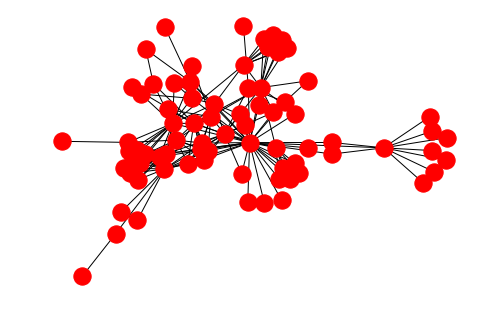

In [4]:
nx.draw(g)
plt.draw()

# Community detection 

In this section, we will focus on community detection algorithm. For this, have a look to the networkx package documentation and apply the following community detection algorithms:
 
   1. Kernighan–Lin bipartition algorithm
   2. Percolation method
   3. Fluid communities algorithm
   4. Girvan-Newman method
 
When the number of communities to detect has to be specified as a parameter, you will use the coverage metric to select the appropriate number (ranging from 2 to 5).
 
Finally, for each community algorithm, you will add an attribute to each node of the graph. The value of the attribute will be the identifier of the community tne node belongs to (ranging from 0 to nbCommunity -1).

## Community visualization

We will now visualize the result of the communication detection algorithm. For this, we start by filtering out some nodes from the visualisation. Particularly, we would like to filter out nodes that do not belong to any communities according to the percolation method. To do so, you need to create a list that contains the label of nodes belonging to a community according to the percolation method.
You can use the following dictionnary to set the visualisation options.

```
options = {
    'node_color' : colorNode, # a list that contains the community id for the nodes we want to plot
    'node_size' : 10000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 15,
    "nodelist" : nodes, # A list that contains the labels of the nodes we want to plot
    "alpha" : 0.8   
}

plt.figure(figsize=(18,18))
nx.draw(g,**options)
```

# Link prediction
We now focus on link prediction and tackle this problem using 2 methods: unsupervised and supervised.

## Unsupervised
We start by the unsupervised perspective. 
We first build a Panda Series from the edges of the graph and then select a sample of size 50 from this series.

Then, in order to see if metrics we have discussed in this lecture are effective, edges in the sample have to be removed from a copied version of `g`.

We can calculate some metrics to determine the strength of a potential link between two nodes. We will then select the top 50 potential links and compare them to the one we have just removed to assess how effective are these metrics over this dataset. You will apply the following methodology:

  1. Calculate the metrics for all non-existant pairs of nodes
  2. Build a dataframe to store these scores and extract the top 50 potential links
  3. Use the `isin` function over the sample of edges to count how many removed edges are in the top 50
  
Repeat this process with the following link prediction metrics :
  1. Resource allocation index
  2. Jaccard coefficient
  3. Adamic-Adar index
  4. Preferential attachment

## Supervised
From previous results, it is hard to say that the above-used features are outstanding... We now try to combine them in a supervised setting. To achieve this, please carrefully apply the following procedure.

1/ Set a variable `sizeTestSet` to 50, a variable `sizeTrainingPositiveSet` to the number of edges in g minus the size of the test set and, a variable `sizeTrainingSet` to 2 times the size of the positive training set.

In [ ]:
sizeTestSet = 50
sizeTrainingPositiveSet = len(g.edges()) - sizeTestSet
sizeTrainingSet = 2 * sizeTrainingPositiveSet

2/ We will build the positive training set and the test set. To do so, first copy the graph `g` into `g_training`. Second, generate a sample of size `sizeTestSet`, denoted by `sampleTest`, from the series of edges of `g_training`. This sample will be your test set (we will apply our model on it and hope the existence of a link will be predicted). Then, remove from `g_training` the edges in `sampleTest`. Finally, convert the remaining edges as a series.

3/ To balance the training set, we will randomly pick pairs of unconnected vertices (negative class). The number of pairs should be equal to the number of considered connections (positive class) in the training set. Find a way to generate this negative training set and name it `sampleNegativeTraining`.

4/ It is now time to calculate the features for each member of the training and test sets. The features list is presented below:
  1. size of the shortest path
  2. number of shortest paths
  3. for each community algorithm, does the vertices associated to a connection belongs to the same community (except -1) : 1 or 0
  4. for each link prediction algorithm, the strength of the connection
  
The feature list is:
```
features = [
    "lShortestPath",
    "nbShortestPath",
    "bipartition",
    "percolation",
    "fluid",
    "girvan",
    "resource",
    "jaccard",
    "adamic",
    "preferential",
    "class"
]
```

5/ Use the following code (and modify it if necessary) to create 2 empty data frames (one for the training set and the other for the test set).

In [ ]:
import numpy as np
sampleTraining = pd.concat([samplePositiveTraining,sampleNegativeTraining],ignore_index=True)
dfTraining = pd.DataFrame(np.zeros((sizeTrainingSet, 11)), columns=features, index= pd.MultiIndex.from_tuples(sampleTraining))
dfTest = pd.DataFrame(np.zeros((sizeTestSet, 11)), columns=features, index= pd.MultiIndex.from_tuples(sampleTest))

6/ Write a function `calculateFeatures` with the following specifications:

INPUT : 
  - `sample`: the series of edges you want to calculate the feature values
  - `df`: the data frame you want to update
  - `training`: True if edges in `sample` are in the training set and False otherwise
  - `positive`: True if `training = True` and positive instances are considered
 
OUTPUT
  - No output

OBJECTIVE

Update `df` (the rows such that their indexes are in `sample`) with the feature values

7/ Call the function with the apropriate parameters (tips: it should be called 3 times)

8/ Apply the following code and conclude:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

features = list(dfTraining.columns[:10])
y = dfTraining["class"]
X = dfTraining[features]
dt = DecisionTreeClassifier(min_samples_split=10, random_state=99)
dt.fit(X, y)
dt.predict(dfTest[features])